In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Create multiple labels

In [5]:
y_train_large = (y_train >=7)
y_train_odd = (y_train %2 ==1)

In [6]:
y_multilabel = np.c_[y_train_large, y_train_odd]

### Fit Classifier

In [7]:
knn_clf = KNeighborsClassifier()

In [8]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
some_digit = X[0]

In [10]:
knn_clf.predict([some_digit])

array([[False,  True]])

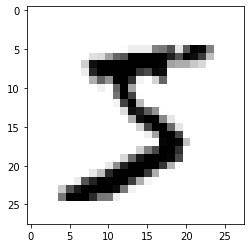

In [11]:
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.show()

In [17]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train[:20000], y_multilabel[:20000], cv=3)
#too expensive to train entire dataset, 20k subset used

In [18]:
f1_score(y_multilabel[:20000], y_train_knn_pred, average='macro')

0.9633263555864175

### Multioutput Classification

#### Add noise to train and test set

In [19]:
noise = np.random.randint(0,100, (len(X_train), 784))

In [21]:
X_train_noisy = X_train + noise

In [23]:
noise_test = np.random.randint(0,100, (len(X_test), 784))

In [29]:
X_test_noisy = X_test +noise_test

#### Set targets to original image representations

In [26]:
y_train_mod = X_train

In [27]:
y_test_mod = X_test

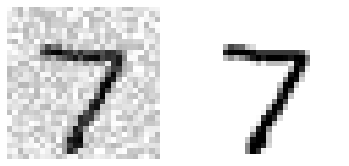

In [61]:
fig, ax = plt.subplots(1,2)
ax[1].imshow(X_test[0].reshape(28,28), cmap = mpl.cm.binary, interpolation = 'nearest')
ax[1].axis("off")
ax[0].imshow(X_test_noisy[0].reshape(28,28), cmap= mpl.cm.binary, interpolation = 'nearest')
ax[0].axis("off")
plt.show()

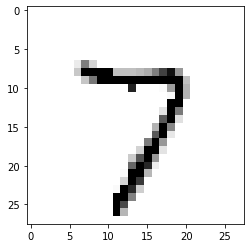

In [49]:
knn_clf.fit(X_train_noisy, y_train_mod)
clean_digit = knn_clf.predict([X_test_noisy[0]])
plt.imshow(clean_digit.reshape(28,28), cmap = mpl.cm.binary, interpolation = 'nearest')